Image classification with Convolutional Neural Networks (20 points)

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD
import numpy as np

In [ ]:
# loading the dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def process_dataset(trainX, trainY, testX, testY):
    # reshape features and normalize
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    trainX = trainX.astype('float32')
    testX = testX.astype('float32')
    trainX = trainX / 255.0
    testX = testX / 255.0
    # converting labels to one-hot encoding
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
trainX, trainY, testX, testY = process_dataset(trainX, trainY, testX, testY)

We then define the model. Similar to in-class demo, this model has 1 convolution layer with 32 filters, followed by one
 2-by-2 MaxPooling layer. The output from MaxPooling layer is then flattened and goes through two linear layers, with 100 and 10 hidden
units respectively. We use Stochastic Gradient Descent as our optimizer, and we can adjust its learning rate.

In [ ]:
def define_model(learning_rate):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Now we can train and evaulate the specified model. Here we're using the test set as the validation set for simplicity.
However, to be more rigorous we often split the training dataset into train/validation sets and tune the hyperparameters using
only the training dataset, and we test the model on the test set after figuring out the best hyperparameters.

In [ ]:

# here we define a model with lr=0.01
model = define_model(0.01)
history = model.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.7653 - loss: 0.8904 - val_accuracy: 0.9335 - val_loss: 0.2294
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9333 - loss: 0.2278 - val_accuracy: 0.9485 - val_loss: 0.1714
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9499 - loss: 0.1727 - val_accuracy: 0.9555 - val_loss: 0.1445
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9578 - loss: 0.1385 - val_accuracy: 0.9664 - val_loss: 0.1194
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9638 - loss: 0.1182 - val_accuracy: 0.9669 - val_loss: 0.1080
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9693 - loss: 0.1025 - val_accuracy: 0.9687 - val_loss: 0.1035
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9719 - loss: 0.0929 - val_accuracy: 0.9680 - val_loss: 0.0984
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9750 -

Once training is completed, we can plot the train/validation losses and train/validation accuracies.

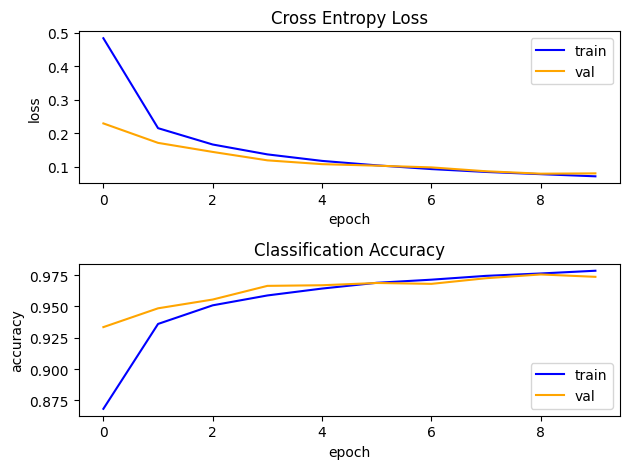

In [ ]:
#plot loss
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend(('train','val'))
plt.xlabel('epoch')
plt.ylabel('loss')

# plot accuracy
plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend(('train','val'))
plt.xlabel('epoch')
plt.ylabel('accuracy')
fig.tight_layout()
plt.show()



The Cross Entropy Loss decreases rapidly at the beginning and stabilizes at a low value showing successful convergence. The classification accuracy increases quickly and reaches a high value, suggesting effective learning. The validation accuracy closely follows the training accuracy, showing no significant overfitting, which implies that the model generalizes well to unseen data.

These results suggest that the chosen learning rate (0.01) is well-tuned, allowing for smooth convergence, while the CNN architecture, consisting of convolutional, pooling, and dense layers, is well-suited for image classification. Additionally, the batch size and number of epochs appear to be appropriate leading to stable training and effective generalization.



Recall from lecture that we update the weights of the neural network by first calculate the gradients with backpropagation from the loss $L$, then update the weights by $$ w = w - \eta*\frac{\partial L}{\partial w}$$
Here, $\eta$ is the learning rate and decides the step size of updates. Previously we used $\eta=0.01$. We want to see the effect of learning rate on the training process, therefore we would like to try two other choices of $\eta$. (1) $\eta=1$ (2) $\eta=$1e-5 (0.00001)

In [ ]:
#### TODO 1 STARTS ###
model_eta_large = define_model(learning_rate=1.0)
history_eta_large = model_eta_large.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))
#### TODO 1 ENDS ###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.1073 - loss: 2.3988 - val_accuracy: 0.1028 - val_loss: 2.3111
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.1097 - loss: 2.3077 - val_accuracy: 0.1009 - val_loss: 2.3051
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.1056 - loss: 2.3089 - val_accuracy: 0.0892 - val_loss: 2.3151
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.1037 - loss: 2.3089 - val_accuracy: 0.0980 - val_loss: 2.3074
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.1064 - loss: 2.3080 - val_accuracy: 0.1135 - val_loss: 2.3045
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.1013 - loss: 2.3087 - val_accuracy: 0.1135 - val_loss: 2.3063
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.1041 - loss: 2.3087 - val_accuracy: 0.1135 - val_loss: 2.3036
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.1029 -

In [ ]:
#### TODO 2 STARTS ###
model_eta_small = define_model(learning_rate=1e-5)
history_eta_small = model_eta_small.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))
#### TODO 2 ENDS ###

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.1148 - loss: 2.3094 - val_accuracy: 0.1260 - val_loss: 2.2996
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.1229 - loss: 2.2969 - val_accuracy: 0.1349 - val_loss: 2.2866
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.1373 - loss: 2.2831 - val_accuracy: 0.1449 - val_loss: 2.2742
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.1420 - loss: 2.2734 - val_accuracy: 0.1566 - val_loss: 2.2621
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.1605 - loss: 2.2599 - val_accuracy: 0.1696 - val_loss: 2.2503
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.1749 - loss: 2.2485 - val_accuracy: 0.1890 - val_loss: 2.2386
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.1941 - loss: 2.2378 - val_accuracy: 0.2154 - val_loss: 2.2270
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.2230 -

We now compare the training accuracy of the two above models with the training accuracy of the model in part 1.

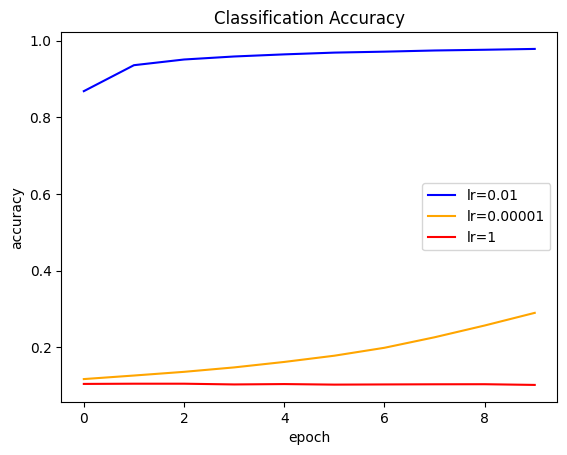

In [ ]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history_eta_small.history['accuracy'], color='orange')
plt.plot(history_eta_large.history['accuracy'], color='red')
plt.legend(('lr=0.01','lr=0.00001','lr=1'))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

The model with the LR of 0.01 learns effectively as it almost immideatly reached a high accuracy within a few epochs. The model with a very large LR of 1 remains close to zero meaning it failed to learn. This suggests that the weight updates are too aggressive, likely causing the loss function to oscillate without converging. The model with a very small LR 0.0000 learns extremely slowly, indicating that updates are too small for effective learning within the given epochs. A better learning rate than the baseline might be found by tuning within the range 0.001 to 0.05.

Till now we have tried various learning rates with SGD. There are various ways to make SGD behave more intelligently,
one of which is momentum. Intuitively, when SGD tries to descend down a valley (an analogy for the case
where the gradient of one dimension is larger than gradient of another dimension), SGD might bounce between the walls of the valley instead of descending along the valley. This makes SGD converge slower or even stuck. Momentum works by dampening the oscillations of SGD and encourages it to follow a smoother path. Formally, SGD with momentum update weights by the following way:

$$z^{k+1} = \beta z^{k} + \frac{\partial L}{\partial w^k}$$
$$w^{k+1} = w^{k} - \eta*z^{k+1}$$

Here $\beta$ is the momentum and is between 0 and 1. The official documentation of SGD details how to specify momentum (https://keras.io/api/optimizers/sgd/). If you want to learn more about momentum, this post might be helpful: https://distill.pub/2017/momentum/

Please define a model with learning rate 0.01 and momentum 0.9, then compare it to the baseline in part 1.

In [ ]:
def define_model_with_momentum(learning_rate,momentum):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    #### TODO 3 STARTS ###
    opt = SGD(learning_rate=learning_rate, momentum=momentum)
    #### TODO 3 ENDS ###
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
#### TODO 4 STARTS ###
model_momentum = define_model_with_momentum(learning_rate=0.01, momentum=0.9)
history_momentum = model_momentum.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))
#### TODO 4 ENDS ###

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.8601 - loss: 0.4424 - val_accuracy: 0.9720 - val_loss: 0.0909
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9735 - loss: 0.0847 - val_accuracy: 0.9806 - val_loss: 0.0619
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9858 - loss: 0.0513 - val_accuracy: 0.9836 - val_loss: 0.0476
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9892 - loss: 0.0347 - val_accuracy: 0.9857 - val_loss: 0.0472
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9933 - loss: 0.0232 - val_accuracy: 0.9858 - val_loss: 0.0423
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9948 - loss: 0.0179 - val_accuracy: 0.9853 - val_loss: 0.0430
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9961 - loss: 0.0134 - val_accuracy: 0.9872 - val_loss: 0.0395
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9974 -

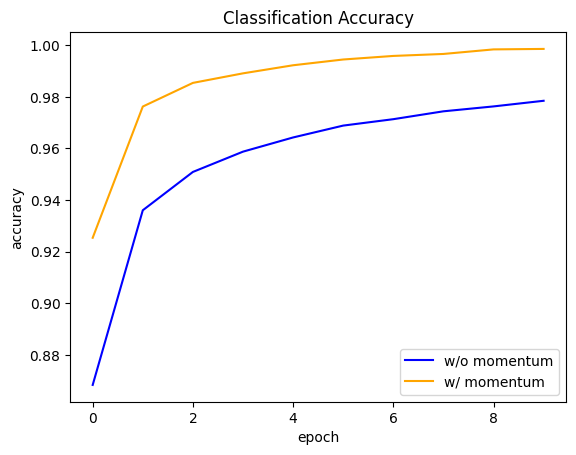

In [ ]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history_momentum.history['accuracy'], color='orange')
plt.legend(('w/o momentum','w/ momentum'))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

To increase model capacity (the ability to fit more complex dataset), one way is to adding layers to the model. In part
1, the model given to you has the following layers before the final 2 dense layers:
    
(1) 2D convolution with 32 filters of size 3-by-3, stride 1-by-1, 'valid' padding and relu activations

(2) 2-by-2 Max Pooling layer

(2) Flatten layer

In the function below, please implement a model with the following layers (in this order):

(1) 2D convolution with 32 filters of size 3-by-3, stride 1-by-1, 'valid' padding and relu activations

(2) 2-by-2 Max Pooling layer

(1) 2D convolution with 64 filters of size 3-by-3, stride 1-by-1, 'valid' padding and relu activations

(2) 2-by-2 Max Pooling layer

(2) Flatten layer

In [ ]:
def define_model_2_conv(learning_rate):
    model = Sequential()
    #### TODO 5 STARTS ###
    # adding layers here
    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())

    #### TODO 5 ENDS ###
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# define model and train
#### TODO 6 STARTS ###
model_2_layer = define_model_2_conv(learning_rate=0.01)
history_2_layer = model_2_layer.fit(trainX, trainY, batch_size=32, epochs=10, validation_data=(testX, testY))
#### TODO 6 ENDS ###

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.6847 - loss: 1.0592 - val_accuracy: 0.9502 - val_loss: 0.1697
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9488 - loss: 0.1706 - val_accuracy: 0.9634 - val_loss: 0.1158
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - accuracy: 0.9681 - loss: 0.1068 - val_accuracy: 0.9729 - val_loss: 0.0888
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9736 - loss: 0.0877 - val_accuracy: 0.9800 - val_loss: 0.0664
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - accuracy: 0.9767 - loss: 0.0738 - val_accuracy: 0.9807 - val_loss: 0.0593
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9816 - loss: 0.0624 - val_accuracy: 0.9748 - val_loss: 0.0729
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9827 - loss: 0.0543 - val_accuracy: 0.9850 - val_loss: 0.0482
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9846 -

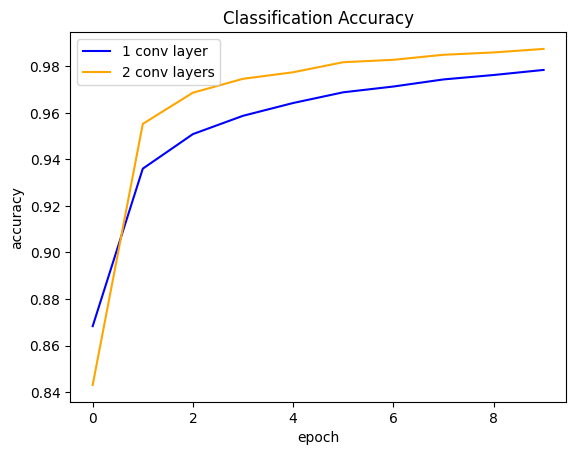

In [ ]:
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history_2_layer.history['accuracy'], color='orange')
plt.legend(('1 conv layer','2 conv layers'))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


The plot shows that adding an extra convolutional layer improves the training accuracy. The two-layer model learns faster in the early epochs and reaches a slightly higher final accuracy. This improvement is likely due to the additional convolutional layer allowing the model to learn more complex features from the dataset, such as edges, textures, and hierarchical patterns. The increased capacity enables better feature extraction, leading to better classification performance.